<a href="https://colab.research.google.com/github/melirandazzo/trabajo_ciencia_datos/blob/main/Visualizaci%C3%B3n%20-%20Randazzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import  numpy as np
import seaborn as sns
import matplotlib as mpl

pd.reset_option('display.max_rows')

# Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

df=pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
df_n=df[['Survived','Sex','SibSp']].groupby(by=['Sex','SibSp']).count().reset_index()
df_n

,Sex,SibSp,Survived
0,female,0,174
1,female,1,106
2,female,2,13
3,female,3,11
4,female,4,6
5,female,5,1
6,female,8,3
7,male,0,434
8,male,1,103
9,male,2,15


In [57]:
df_n["SibSp"] = np.where(df_n["SibSp"] >= 1, 'true', 'false')
df_SibSp = df_n[['Survived','Sex','SibSp']].groupby(by=['Sex','SibSp']).sum().reset_index()
df_SibSp

,Sex,SibSp,Survived
0,female,false,174
1,female,true,140
2,male,false,434
3,male,true,143


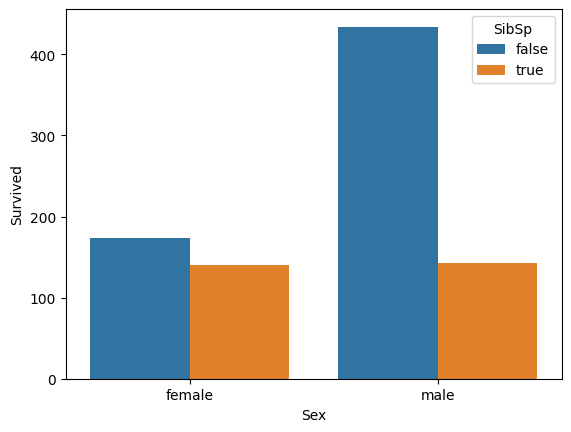

In [58]:
sns.barplot(y='Survived',x='Sex',hue='SibSp',data=df_SibSp);

En Este Grafico se muestra cuantas personas sobrevivieron por genero teniendo hermanos a bordo

In [62]:
df_p=df[['Survived','Sex','Parch']].groupby(by=['Sex','Parch']).count().reset_index()
df_p

,Sex,Parch,Survived
0,female,0,194
1,female,1,60
2,female,2,49
3,female,3,4
4,female,4,2
5,female,5,4
6,female,6,1
7,male,0,484
8,male,1,58
9,male,2,31


In [63]:
df_p["Parch"] = np.where(df_p["Parch"] >= 1, 'true', 'false')
df_Parch = df_p[['Survived','Sex','Parch']].groupby(by=['Sex','Parch']).sum().reset_index()
df_Parch

,Sex,Parch,Survived
0,female,false,194
1,female,true,120
2,male,false,484
3,male,true,93


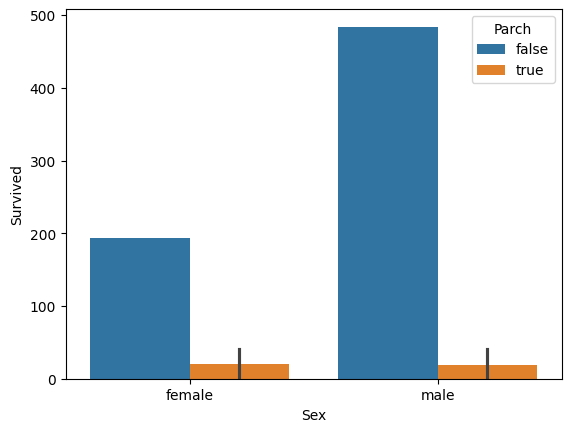

In [68]:
sns.barplot(y='Survived',x='Sex',hue='Parch',data=df_p);

En este gráfico se muestra cuantas personas sobrebivieron teniendo hijos por genero

<Axes: xlabel='Age', ylabel='Count'>

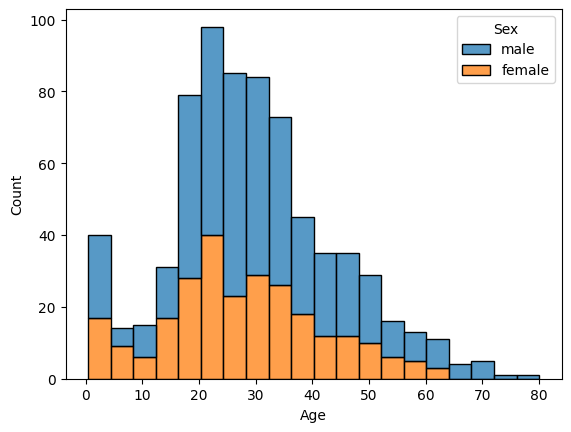

In [71]:
sns.histplot(data=df, x="Age", hue="Sex", multiple="stack")

Este grafico muestra la cantidad de personas por genero y por edad

In [72]:
tarifas = df['Fare']
tarifas

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [79]:
edad = df['Age']
edad

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Text(0, 0.5, 'Edad')

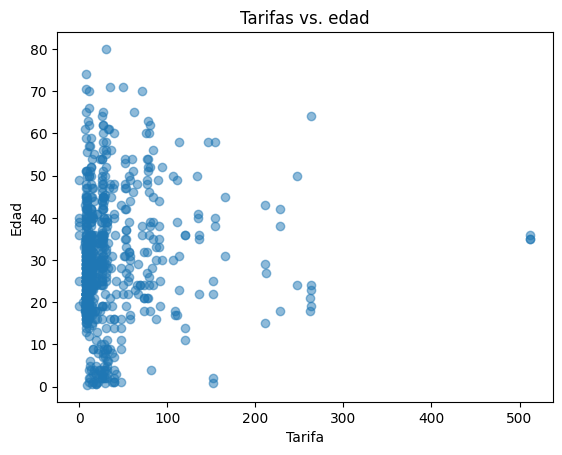

In [80]:
fig, ax = plt.subplots()
ax.scatter(tarifas, edad, alpha=0.5)
#alpha es opcional y sirve para la transparencia de los puntos
ax.set_title('Tarifas vs. edad')
ax.set_xlabel('Tarifa')
ax.set_ylabel('Edad')

In [81]:
df_survived = df[['Survived','Pclass']].groupby(by=['Pclass']).count().reset_index()
df_survived

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [82]:
clase = df_survived['Pclass']
clase

0    1
1    2
2    3
Name: Pclass, dtype: int64

In [87]:
sobrevivientes = df_survived['Survived']
sobrevivientes

0    216
1    184
2    491
Name: Survived, dtype: int64

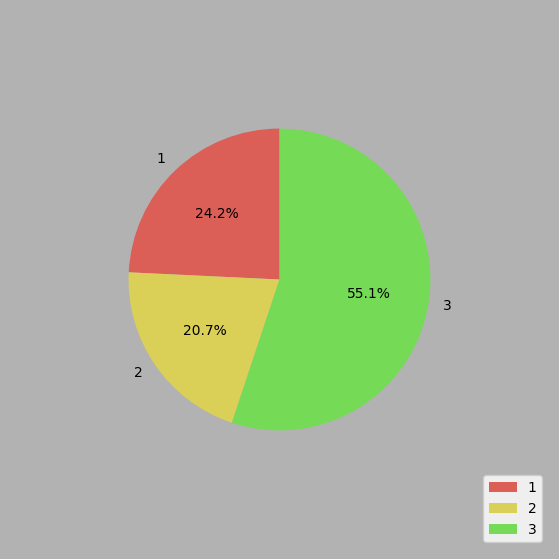

In [91]:
fig,ax = plt.subplots(figsize =(8,7))
fig.set_facecolor('#b2b2b2')
ax.pie(sobrevivientes, labels = clase,radius=0.7, startangle=90, explode= (0,0,0), autopct= "%1.1f%%", colors=sns.color_palette("hls",7))
plt.legend(loc="lower right",labels=clase,fontsize=10)
plt.show()

El grafico muestra porcentajes de sobrevivientes por clase

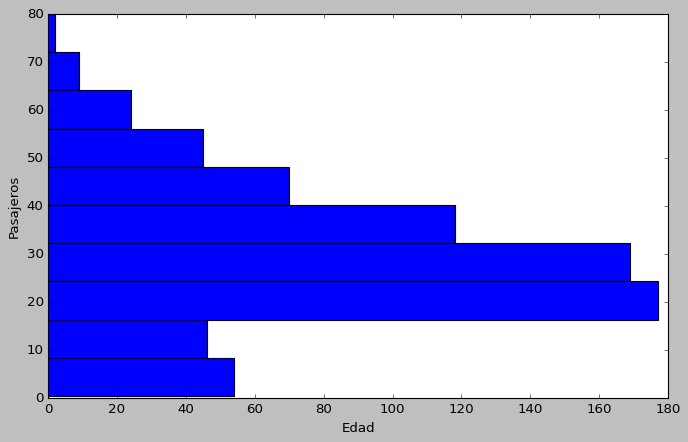

In [96]:
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= df['Age'], bins=None, orientation='horizontal')
ax.set_xlabel('Edad')
ax.set_ylabel('Pasajeros')
plt.show()